# Housing Data and GDP Investigation

How did the 2008 Recession Affect the Housing Market?
Which Cities Were Hit the Hardest? 

Definitions:
* A _quarter_ is a specific three month period, Q1 is January through March, Q2 is April through June, Q3 is July through September, Q4 is October through December.
* A _recession_ is defined as starting with two consecutive quarters of GDP decline, and ending with two consecutive quarters of GDP growth.
* A _recession bottom_ is the quarter within a recession which had the lowest GDP.

Data: 
* From the [Zillow research data site](http://www.zillow.com/research/data/) there is housing data for the United States. In particular the datafile for [all homes at a city level](http://files.zillowstatic.com/research/public/City/City_Zhvi_AllHomes.csv), ```City_Zhvi_AllHomes.csv```, has median home sale prices at a fine grained level.

* From Bureau of Economic Analysis, US Department of Commerce, the [GDP over time](http://www.bea.gov/national/index.htm#gdp) of the United States in current dollars (use the chained value in 2009 dollars), in quarterly intervals, in the file ```gdplev.xls```. For this assignment, only look at GDP data from the first quarter of 2000 onward.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from ggplot import *
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
def get_gdp_df():
    '''Returns a DataFrame of the quarters, GDP(in 2009 dollars), and change from previous quarter
    from 2000q1 until 2016q2. 
    '''
    gdp_data = pd.read_excel('gdplev.xls', names=['Quarter','GDP in 2009 Dollars'],parse_cols=[4,6], skiprows=7)
    gdp_data['Change'] = gdp_data['GDP in 2009 Dollars'].diff()
    start = np.where(gdp_data['Quarter']=='2000q1')[0][0]
    gdp_data = gdp_data[start:]
    gdp_data.reset_index(inplace=True)
    return gdp_data
           
get_gdp_df().head()

,index,Quarter,GDP in 2009 Dollars,Change
0,212,2000q1,12359.1,35.8
1,213,2000q2,12592.5,233.4
2,214,2000q3,12607.7,15.2
3,215,2000q4,12679.3,71.6
4,216,2001q1,12643.3,-36.0


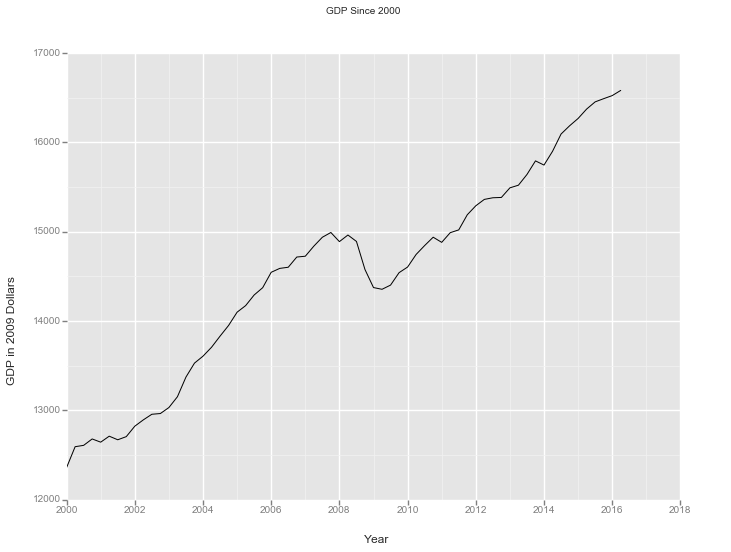

<ggplot: (302034929)>

In [118]:
#DataFrame
gdp_df = get_gdp_df()

#Get Axis Labels
x_labels = []
quarter_dict = {'q1':0,'q2':.25,'q3':.5,'q4':.75}
for item in gdp_df['Quarter']:
    quarter = item[-2:]
    new_name = int(item[:4]) + quarter_dict[quarter]
    x_labels.append(new_name)

gdp_df['Quarter'] = x_labels    

p1 = ggplot(aes(x='Quarter', y='GDP in 2009 Dollars'), data=gdp_df)

GDP_Line = p1 + geom_line() + scale_x_continuous(name='Year') + \
            ggtitle("GDP Since 2000")


GDP_Line 

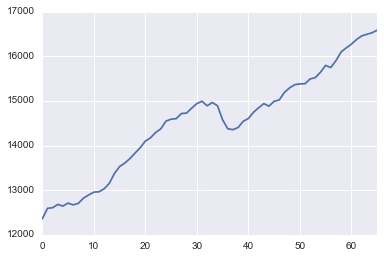

In [37]:
gdp_df['GDP in 2009 Dollars'].plot()

In [17]:
def get_recession_start():
    '''Returns the year and quarter of the recession start time as a 
    string value in the format yyyyq#'''
    
    gdp_data = get_gdp_df()
    for i,item in gdp_data.iterrows():
        if item['Change']<0 and gdp_data.loc[i+1]['Change']<0:
            return gdp_data.loc[i]['Quarter']
        
def get_recession_end():
    '''Returns the year and quarter of the recession end time as a 
    string value in the format yyyyq#'''
    
    gdp_data = get_gdp_df()
    recession_start = get_recession_start()
    start_index = gdp_data[gdp_data['Quarter'] == recession_start].index.tolist()[0]
    gdp_data = gdp_data[start_index:]
    for i,item in gdp_data.iterrows():
        if item['Change']>0 and gdp_data.loc[i+1]['Change']>0:
            return gdp_data.loc[i+1]['Quarter']  
    return gdp_data
    
print "Start:",get_recession_start(),"    End:", get_recession_end()

Start: 2008q3     End: 2009q4


In [18]:
def get_recession_bottom():
    '''Returns the year and quarter of the recession bottom time as a 
    string value in the format yyyyq#'''
    gdp_data = get_gdp_df()
    recession_start = get_recession_start()
    start_index = gdp_data[gdp_data['Quarter'] == recession_start].index.tolist()[0]
    recession_end = get_recession_end()
    end_index = gdp_data[gdp_data['Quarter'] == recession_end].index.tolist()[0]
    gdp_data = gdp_data[start_index:end_index]
    min_index = gdp_data['GDP in 2009 Dollars'].argmin()
    return gdp_data.loc[min_index]['Quarter']

get_recession_bottom()

u'2009q2'

In [21]:
# Dictionary to map two letter acronyms to full State Names
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 
          'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama', 
          'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 
          'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 
          'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 
          'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 
          'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 
          'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 
          'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 
          'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 
          'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 
          'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 
          'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 
          'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 
          'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 
          'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 
          'ND': 'North Dakota', 'VA': 'Virginia'} 

In [50]:
def convert_housing_data_to_quarters():
    '''Takes the housing data and converts it to a Dataframe with 
    average GDP per quarter from 2000-2016.
    '''
    #Set Up City DataFrame
    city_data = pd.read_csv('City_Zhvi_AllHomes.csv')
    city_data['State'].replace(states, inplace=True)
    city_data.set_index(["State","RegionName"], inplace=True)
    city_data.drop(city_data.columns[0:4], axis=1, inplace=True)
    
    #Fix Names of Columns
    new_columns=[]
    for column in city_data:
        new_columns.append(pd.to_datetime(column))
    city_data.columns = new_columns
    
    #Reformat DataFrame
    city_data = city_data.loc[:,"2000":]
    city_data = city_data.resample('QS', axis=1).mean()
    
    #Fix Nameing of Columns
    city_data = city_data.rename(columns=lambda x: timestamp_to_quarter(x))
    return city_data

def timestamp_to_quarter(time):
    '''Helper Function to change months to Quarter ID
    '''
    if time.month==1:
        quarter='q1'
    if time.month==4:
        quarter='q2'
    if time.month==7:
        quarter='q3'
    if time.month==10:
        quarter='q4'
    return str(time.year) + quarter

convert_housing_data_to_quarters().head()

,,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,2002q1,2002q2,...,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3,2016q4
State,RegionName,,,,,,,,,,,,,,,,,,,,,
New York,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,518933.333333,521800.000000,523566.666667,532500.000000,548000.000000,561466.666667,572633.333333,585333.333333,602300.000000,620933.333333
California,Los Angeles,207066.666667,214466.666667,220966.666667,226166.666667,233000.000000,239100.000000,245066.666667,253033.333333,261966.666667,272700.000000,...,508966.666667,517833.333333,526933.333333,535566.666667,545033.333333,556866.666667,568266.666667,581433.333333,590133.333333,604533.333333
Illinois,Chicago,138400.000000,143633.333333,147866.666667,152133.333333,156933.333333,161800.000000,166400.000000,170433.333333,175500.000000,177566.666667,...,190166.666667,193566.666667,194900.000000,198900.000000,201533.333333,202700.000000,204033.333333,205833.333333,207866.666667,212300.000000
Pennsylvania,Philadelphia,53000.000000,53633.333333,54133.333333,54700.000000,55333.333333,55533.333333,56266.666667,57533.333333,59133.333333,60733.333333,...,115966.666667,116633.333333,116766.666667,117800.000000,120533.333333,122166.666667,123833.333333,126100.000000,130500.000000,132566.666667
Arizona,Phoenix,111833.333333,114366.666667,116000.000000,117400.000000,119600.000000,121566.666667,122700.000000,124300.000000,126533.333333,128366.666667,...,167500.000000,170533.333333,173333.333333,176500.000000,180500.000000,185166.666667,189066.666667,193166.666667,198566.666667,202833.333333


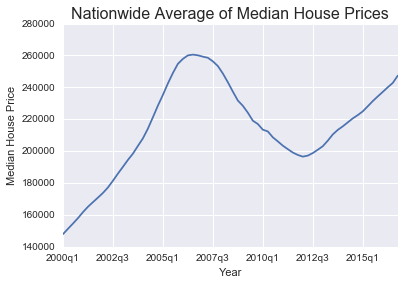

In [67]:
all_cities = convert_housing_data_to_quarters()
all_cities_mean = all_cities.mean()

plt = all_cities_mean.plot()
plt.set_xlabel('Year')
plt.set_ylabel('Median House Price')
plt.set_title('Nationwide Average of Median House Prices',fontsize=16)

In [81]:
def get_price_ratio():
    '''Helper Function to prepare Dataframe for t test.
    Returns Dataframe with State, Region, and Price Ratio Calculation.
    '''
    city_data = convert_housing_data_to_quarters()
    recession_bottom = get_recession_bottom()
    quart_s_rec = pd.to_datetime(get_recession_start())
    quart_b_rec = '{:}q{:}'.format(quart_s_rec.year, quart_s_rec.quarter-1)
    city_data['Price Ratio'] = city_data[quart_b_rec].div(city_data[recession_bottom])
    return city_data

get_price_ratio()

,,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,2002q1,2002q2,...,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3,2016q4,Price Ratio
State,RegionName,,,,,,,,,,,,,,,,,,,,,
New York,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.218000e+05,5.235667e+05,5.325000e+05,5.480000e+05,5.614667e+05,5.726333e+05,5.853333e+05,6.023000e+05,6.209333e+05,1.081789
California,Los Angeles,2.070667e+05,2.144667e+05,2.209667e+05,2.261667e+05,2.330000e+05,2.391000e+05,2.450667e+05,2.530333e+05,2.619667e+05,2.727000e+05,...,5.178333e+05,5.269333e+05,5.355667e+05,5.450333e+05,5.568667e+05,5.682667e+05,5.814333e+05,5.901333e+05,6.045333e+05,1.213716
Illinois,Chicago,1.384000e+05,1.436333e+05,1.478667e+05,1.521333e+05,1.569333e+05,1.618000e+05,1.664000e+05,1.704333e+05,1.755000e+05,1.775667e+05,...,1.935667e+05,1.949000e+05,1.989000e+05,2.015333e+05,2.027000e+05,2.040333e+05,2.058333e+05,2.078667e+05,2.123000e+05,1.083472
Pennsylvania,Philadelphia,5.300000e+04,5.363333e+04,5.413333e+04,5.470000e+04,5.533333e+04,5.553333e+04,5.626667e+04,5.753333e+04,5.913333e+04,6.073333e+04,...,1.166333e+05,1.167667e+05,1.178000e+05,1.205333e+05,1.221667e+05,1.238333e+05,1.261000e+05,1.305000e+05,1.325667e+05,1.017207
Arizona,Phoenix,1.118333e+05,1.143667e+05,1.160000e+05,1.174000e+05,1.196000e+05,1.215667e+05,1.227000e+05,1.243000e+05,1.265333e+05,1.283667e+05,...,1.705333e+05,1.733333e+05,1.765000e+05,1.805000e+05,1.851667e+05,1.890667e+05,1.931667e+05,1.985667e+05,2.028333e+05,1.220571
Nevada,Las Vegas,1.326000e+05,1.343667e+05,1.354000e+05,1.370000e+05,1.395333e+05,1.417333e+05,1.433667e+05,1.461333e+05,1.493333e+05,1.509333e+05,...,1.746333e+05,1.776667e+05,1.803333e+05,1.852333e+05,1.887667e+05,1.922667e+05,1.961333e+05,2.025667e+05,2.066333e+05,1.414129
California,San Diego,2.229000e+05,2.343667e+05,2.454333e+05,2.560333e+05,2.672000e+05,2.762667e+05,2.845000e+05,2.919333e+05,3.012333e+05,3.128667e+05,...,4.859667e+05,4.932000e+05,5.036000e+05,5.127667e+05,5.208333e+05,5.277000e+05,5.327000e+05,5.425000e+05,5.500000e+05,1.133653
Texas,Dallas,8.446667e+04,8.386667e+04,8.486667e+04,8.783333e+04,8.973333e+04,8.930000e+04,8.906667e+04,9.090000e+04,9.256667e+04,9.380000e+04,...,1.097667e+05,1.124667e+05,1.201667e+05,1.280667e+05,1.343000e+05,1.398333e+05,1.455667e+05,1.554000e+05,1.592000e+05,1.097368
California,San Jose,3.742667e+05,4.065667e+05,4.318667e+05,4.555000e+05,4.706667e+05,4.702000e+05,4.568000e+05,4.455667e+05,4.414333e+05,4.577667e+05,...,7.178000e+05,7.375000e+05,7.643000e+05,7.874667e+05,8.051667e+05,8.247333e+05,8.392667e+05,8.349667e+05,8.432333e+05,1.153619


# University Towns Vs. Normal Housing Markets

**Hypothesis**: University towns have their mean housing prices less effected by recessions. Run a t-test to compare the ratio of the mean price of houses in university towns the quarter before the recession starts compared to the recession bottom. (`price_ratio=quarter_before_recession/recession_bottom`)

* A _university town_ is a city which has a high percentage of university students compared to the total population of the city.

The following data files are available for this assignment:

* From the Wikipedia page on college towns is a list of [university towns in the United States](https://en.wikipedia.org/wiki/List_of_college_towns#College_towns_in_the_United_States) which has been copy and pasted into the file ```university_towns.txt```.


In [82]:
def get_list_of_university_towns():
    '''Returns a DataFrame of towns and the states they are in from the 
    university_towns.txt list.'''
    
    text_file = open("university_towns.txt", "r")
    lines = text_file.readlines()
    final_list=[]
    for item in lines:
        if '[edit]' in item:
            end = item.find('[')
            item = item[:end]
            state = item
        else:
            end = item.find(' (')
            item = item[:end]
            final_list.append([state, item])
    final = pd.DataFrame(final_list, columns=["State", "RegionName"] )
    return final

print get_list_of_university_towns().head()
print
print len(get_list_of_university_towns()), "Total University Towns"

     State    RegionName
0  Alabama        Auburn
1  Alabama      Florence
2  Alabama  Jacksonville
3  Alabama    Livingston
4  Alabama    Montevallo

525 Total University Towns


In [83]:
def run_ttest():
    '''Function that runs a ttest comparing the university town values to the non-university towns values.
    
    Return the tuple (different, p, better) where:
    
    Different:
        True if the t-test is True at a p<0.01 (we reject the null hypothesis) 
        or 
        different=False if otherwise (we cannot reject the null hypothesis). 
        
    p:
        is the exact p value returned from scipy.stats.ttest_ind(). 
    
    better:
        Returns either "university town" or "non-university town"
        depending on which has a lower mean price ratio (which is equivilent to a
        reduced market loss).'''
    
    #Get Dataframes from helper function
    df_college, df_non_college = college_vs_not_split()
    
    results = ttest_ind(df_college['Price Ratio'], df_non_college['Price Ratio'], nan_policy='omit')
    better = 0
    p= results.pvalue
    if p < .01:
        different = True
    else:
        different = False
        
    if df_college['Price Ratio'].mean() < df_non_college['Price Ratio'].mean():
        better = "university town"
        
    if df_college['Price Ratio'].mean() > df_non_college['Price Ratio'].mean():
        better = "non-university town"
        
    return (different, p, better)

def college_vs_not_split():
    """Helper function to split college town dataframe, and non college town dataframe.
    """
    #Get Data
    all_cities = pd.DataFrame(get_price_ratio()).reset_index()
    college_towns = get_list_of_university_towns()
    
    #Split Data into Dataframe of College Towns, and Dataframe of Non_College Towns
    indicator_df = pd.merge(college_towns, all_cities, how='outer', on=["State","RegionName"],indicator=True)
    
    df_college = indicator_df[(indicator_df['_merge']=='both')|(indicator_df['_merge']=='left_only')]
    df_non_college = indicator_df[(indicator_df['_merge']=='right_only')]
    return df_college, df_non_college

In [84]:
run_ttest()

(True, 0.0073686391567440272, 'university town')

In [101]:
df_college, df_non_college = college_vs_not_split()

college = df_college.mean()[:-1]
not_college = df_non_college.mean()[:-1]

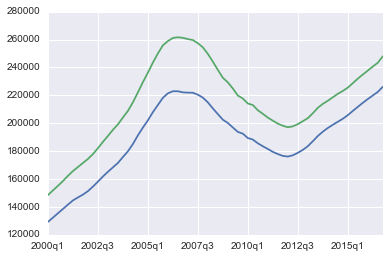

In [105]:
color1=sns.color_palette("OrRd")
color2=sns.color_palette("GnBu_d")

#plt.subplot(2,1,1)
college.plot()
not_college.plot()
plt.set_xlabel('Year')
plt.set_ylabel('Median House Price')
plt.set_title('College Towns versus Non-College Towns',fontsize=16)